In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


In [ ]:
data = pd.read_csv('DATA KEKERASAN.csv', header=0)
data

,Provinsi,Kabupaten_Kota,Kelompok_Usia,Jenis_kelamin,Bentuk_Kekerasan,Tingkat_Pendidikan_Korban,Tempat_Kejadian,Status_Hubungan,Jumlah_Korban,Kategori_Jumlah_Korban,Kategori_Tingkat_Kekerasan,Tahun
0,Jawa Barat,Bogor,6-12 tahun,laki-laki,fisik,tidak sekolah,fasilitas umum,orang tua,35,Tinggi,ZONA MERAH,2017
1,Jawa Barat,Sukabumi,13-17 tahun,laki-laki,fisik,sd,rumah,guru,167,Tinggi,ZONA MERAH,2017
2,Jawa Barat,Bogor,0-5 tahun,perempuan,penelantaran,tidak sekolah,fasilitas umum,orang lain,45,Tinggi,ZONA MERAH,2017
3,Jawa Barat,Sukabumi,13-17 tahun,perempuan,fisik,sd,rumah,teman,170,Tinggi,ZONA MERAH,2017
4,Jawa Barat,Cianjur,6-12 tahun,perempuan,fisik,tidak sekolah,fasilitas umum,orang lain,10,Rendah,ZONA HIJAU,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
374,Jawa Barat,Kota Depok,6-12 tahun,laki-laki,fisik,sltp,rumah,orang tua,28,Tinggi,ZONA MERAH,2023
375,Jawa Barat,Kota Cimahi,6-12 tahun,laki-laki,fisik,sltp,rumah,kerabat/keluarga,20,Rendah,ZONA HIJAU,2023
376,Jawa Barat,Kota Tasikmalaya,0-5 tahun,laki-laki,psikis,sltp,rumah,kerabat/keluarga,10,Rendah,ZONA HIJAU,2023
377,Jawa Barat,Kota Banjar,0-5 tahun,laki-laki,penelantaran,sltp,rumah,orang tua,3,Rendah,ZONA HIJAU,2023


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Provinsi                      0
Kabupaten_Kota                0
Kelompok_Usia                 0
Jenis_kelamin                 0
Bentuk_Kekerasan              0
Tingkat_Pendidikan_Korban     0
Tempat_Kejadian               0
Status_Hubungan               0
Jumlah_Korban                 0
Kategori_Jumlah_Korban        0
Kategori_Tingkat_Kekerasan    0
Tahun                         0
dtype: int64


In [ ]:
data = data.drop(columns=['Provinsi','Tahun','Jumlah_Korban','Kabupaten_Kota','Kategori_Jumlah_Korban'])
data

,Kelompok_Usia,Jenis_kelamin,Bentuk_Kekerasan,Tingkat_Pendidikan_Korban,Tempat_Kejadian,Status_Hubungan,Kategori_Jumlah_Korban,Kategori_Tingkat_Kekerasan
0,6-12 tahun,laki-laki,fisik,tidak sekolah,fasilitas umum,orang tua,Tinggi,ZONA MERAH
1,13-17 tahun,laki-laki,fisik,sd,rumah,guru,Tinggi,ZONA MERAH
2,0-5 tahun,perempuan,penelantaran,tidak sekolah,fasilitas umum,orang lain,Tinggi,ZONA MERAH
3,13-17 tahun,perempuan,fisik,sd,rumah,teman,Tinggi,ZONA MERAH
4,6-12 tahun,perempuan,fisik,tidak sekolah,fasilitas umum,orang lain,Rendah,ZONA HIJAU
...,...,...,...,...,...,...,...,...
374,6-12 tahun,laki-laki,fisik,sltp,rumah,orang tua,Tinggi,ZONA MERAH
375,6-12 tahun,laki-laki,fisik,sltp,rumah,kerabat/keluarga,Rendah,ZONA HIJAU
376,0-5 tahun,laki-laki,psikis,sltp,rumah,kerabat/keluarga,Rendah,ZONA HIJAU
377,0-5 tahun,laki-laki,penelantaran,sltp,rumah,orang tua,Rendah,ZONA HIJAU


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Kelompok_Usia               379 non-null    object
 1   Jenis_kelamin               379 non-null    object
 2   Bentuk_Kekerasan            379 non-null    object
 3   Tingkat_Pendidikan_Korban   379 non-null    object
 4   Tempat_Kejadian             379 non-null    object
 5   Status_Hubungan             379 non-null    object
 6   Kategori_Jumlah_Korban      379 non-null    object
 7   Kategori_Tingkat_Kekerasan  379 non-null    object
dtypes: object(8)
memory usage: 23.8+ KB


In [ ]:
numerical = []
catgcols = []

for col in data.columns:
    if data[col].dtype=="int64":
        numerical.append(col)
    else: 
        catgcols.append(col)

for col in data.columns:
    if col in numerical:
        data[col].fillna(data[col].median(), inplace=True) 
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13252\683813477.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
numerical

[]

In [ ]:
catgcols

['Kelompok_Usia',
 'Jenis_kelamin',
 'Bentuk_Kekerasan',
 'Tingkat_Pendidikan_Korban',
 'Tempat_Kejadian',
 'Status_Hubungan',
 'Kategori_Jumlah_Korban',
 'Kategori_Tingkat_Kekerasan']

In [ ]:
data['Kategori_Tingkat_Kekerasan'].value_counts()

Kategori_Tingkat_Kekerasan
ZONA MERAH    287
ZONA HIJAU     92
Name: count, dtype: int64

In [ ]:
ind_col = [col for col in data.columns if col != 'Kategori_Tingkat_Kekerasan']
dep_col = 'Kategori_Tingkat_Kekerasan'

In [ ]:
data[dep_col].value_counts()

Kategori_Tingkat_Kekerasan
ZONA MERAH    287
ZONA HIJAU     92
Name: count, dtype: int64

In [ ]:
data.to_csv('Kekerasan.csv')

In [ ]:
le = LabelEncoder()

for col in catgcols:
    data[col] = le.fit_transform(data[col])

In [ ]:
data['Kategori_Tingkat_Kekerasan'] = le.fit_transform(data['Kategori_Tingkat_Kekerasan'])

In [ ]:
x = data[ind_col]
y = data[dep_col]

In [ ]:
data

,Kelompok_Usia,Jenis_kelamin,Bentuk_Kekerasan,Tingkat_Pendidikan_Korban,Tempat_Kejadian,Status_Hubungan,Kategori_Jumlah_Korban,Kategori_Tingkat_Kekerasan
0,2,0,0,3,0,4,1,1
1,1,0,0,0,1,0,1,1
2,0,1,1,3,0,3,1,1
3,1,1,0,0,1,5,1,1
4,2,1,0,3,0,3,0,0
...,...,...,...,...,...,...,...,...
374,2,0,0,2,1,4,1,1
375,2,0,0,2,1,1,0,0
376,0,0,2,2,1,1,0,0
377,0,0,1,2,1,4,0,0


In [ ]:
print(data.columns)  # Untuk melihat daftar semua kolom dalam DataFrame


Index(['Kelompok_Usia', 'Jenis_kelamin', 'Bentuk_Kekerasan',
       'Tingkat_Pendidikan_Korban', 'Tempat_Kejadian', 'Status_Hubungan',
       'Kategori_Jumlah_Korban', 'Kategori_Tingkat_Kekerasan'],
      dtype='object')


In [ ]:
data.to_csv('kekerasan-anak.csv')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Membuat Model 

In [ ]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, 
    random_state=42, splitter='best' 
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
akurasi = classification_report(y_test, dtc.predict(x_test))
print("Tingkat Akurasi Algoritma C4.5")
print("Akurasi :", akurasi)
akurasi = accuracy_score(y_test, dtc.predict(x_test))
print("Tingkat Akurasi: %d persen" %(akurasi*100))

akurasi data training = 0.9962264150943396
akurasi data testing = 0.9649122807017544 

confusion matrix : 
[[26  4]
 [ 0 84]]

Tingkat Akurasi Algoritma C4.5
Akurasi :               precision    recall  f1-score   support

           0       1.00      0.87      0.93        30
           1       0.95      1.00      0.98        84

    accuracy                           0.96       114
   macro avg       0.98      0.93      0.95       114
weighted avg       0.97      0.96      0.96       114

Tingkat Akurasi: 96 persen


Confusion Matrix


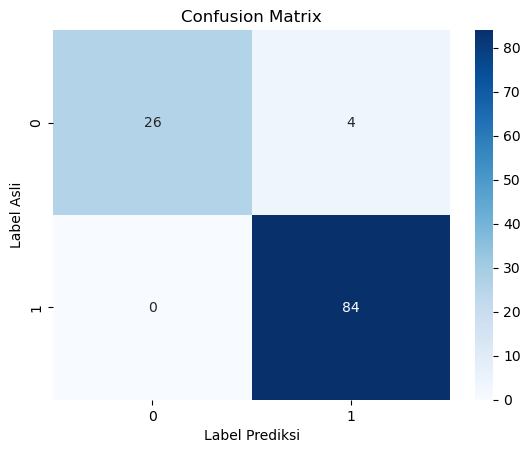

In [ ]:
# Menghitung confusion matrix
confusion = confusion_matrix(y_test, dtc.predict(x_test))

# Memplot confusion matrix
print("Confusion Matrix")
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Label Prediksi')
plt.ylabel('Label Asli')
plt.title('Confusion Matrix')
plt.show()

Simulasi Model

In [ ]:
input_data = (2,0,0,3,0,3,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('Tingkat Kekerasan Rendah')
elif prediction[0] == 1:
    print('Tingkat Kekerasan Sedang')
else:
    print('Tingkat Kekerasan Tinggi')

[1]
Tingkat Kekerasan Sedang


c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Visualisasi Pohon Keputusan

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
tree_data = DecisionTreeClassifier(random_state=42)
tree_data.fit(x_train, y_train)

tree_text = export_text(tree_data, feature_names=list(data.columns))
print(tree_text)

|--- Kategori_Tingkat_Kekerasan <= 0.50
|   |--- class: 0
|--- Kategori_Tingkat_Kekerasan >  0.50
|   |--- class: 1



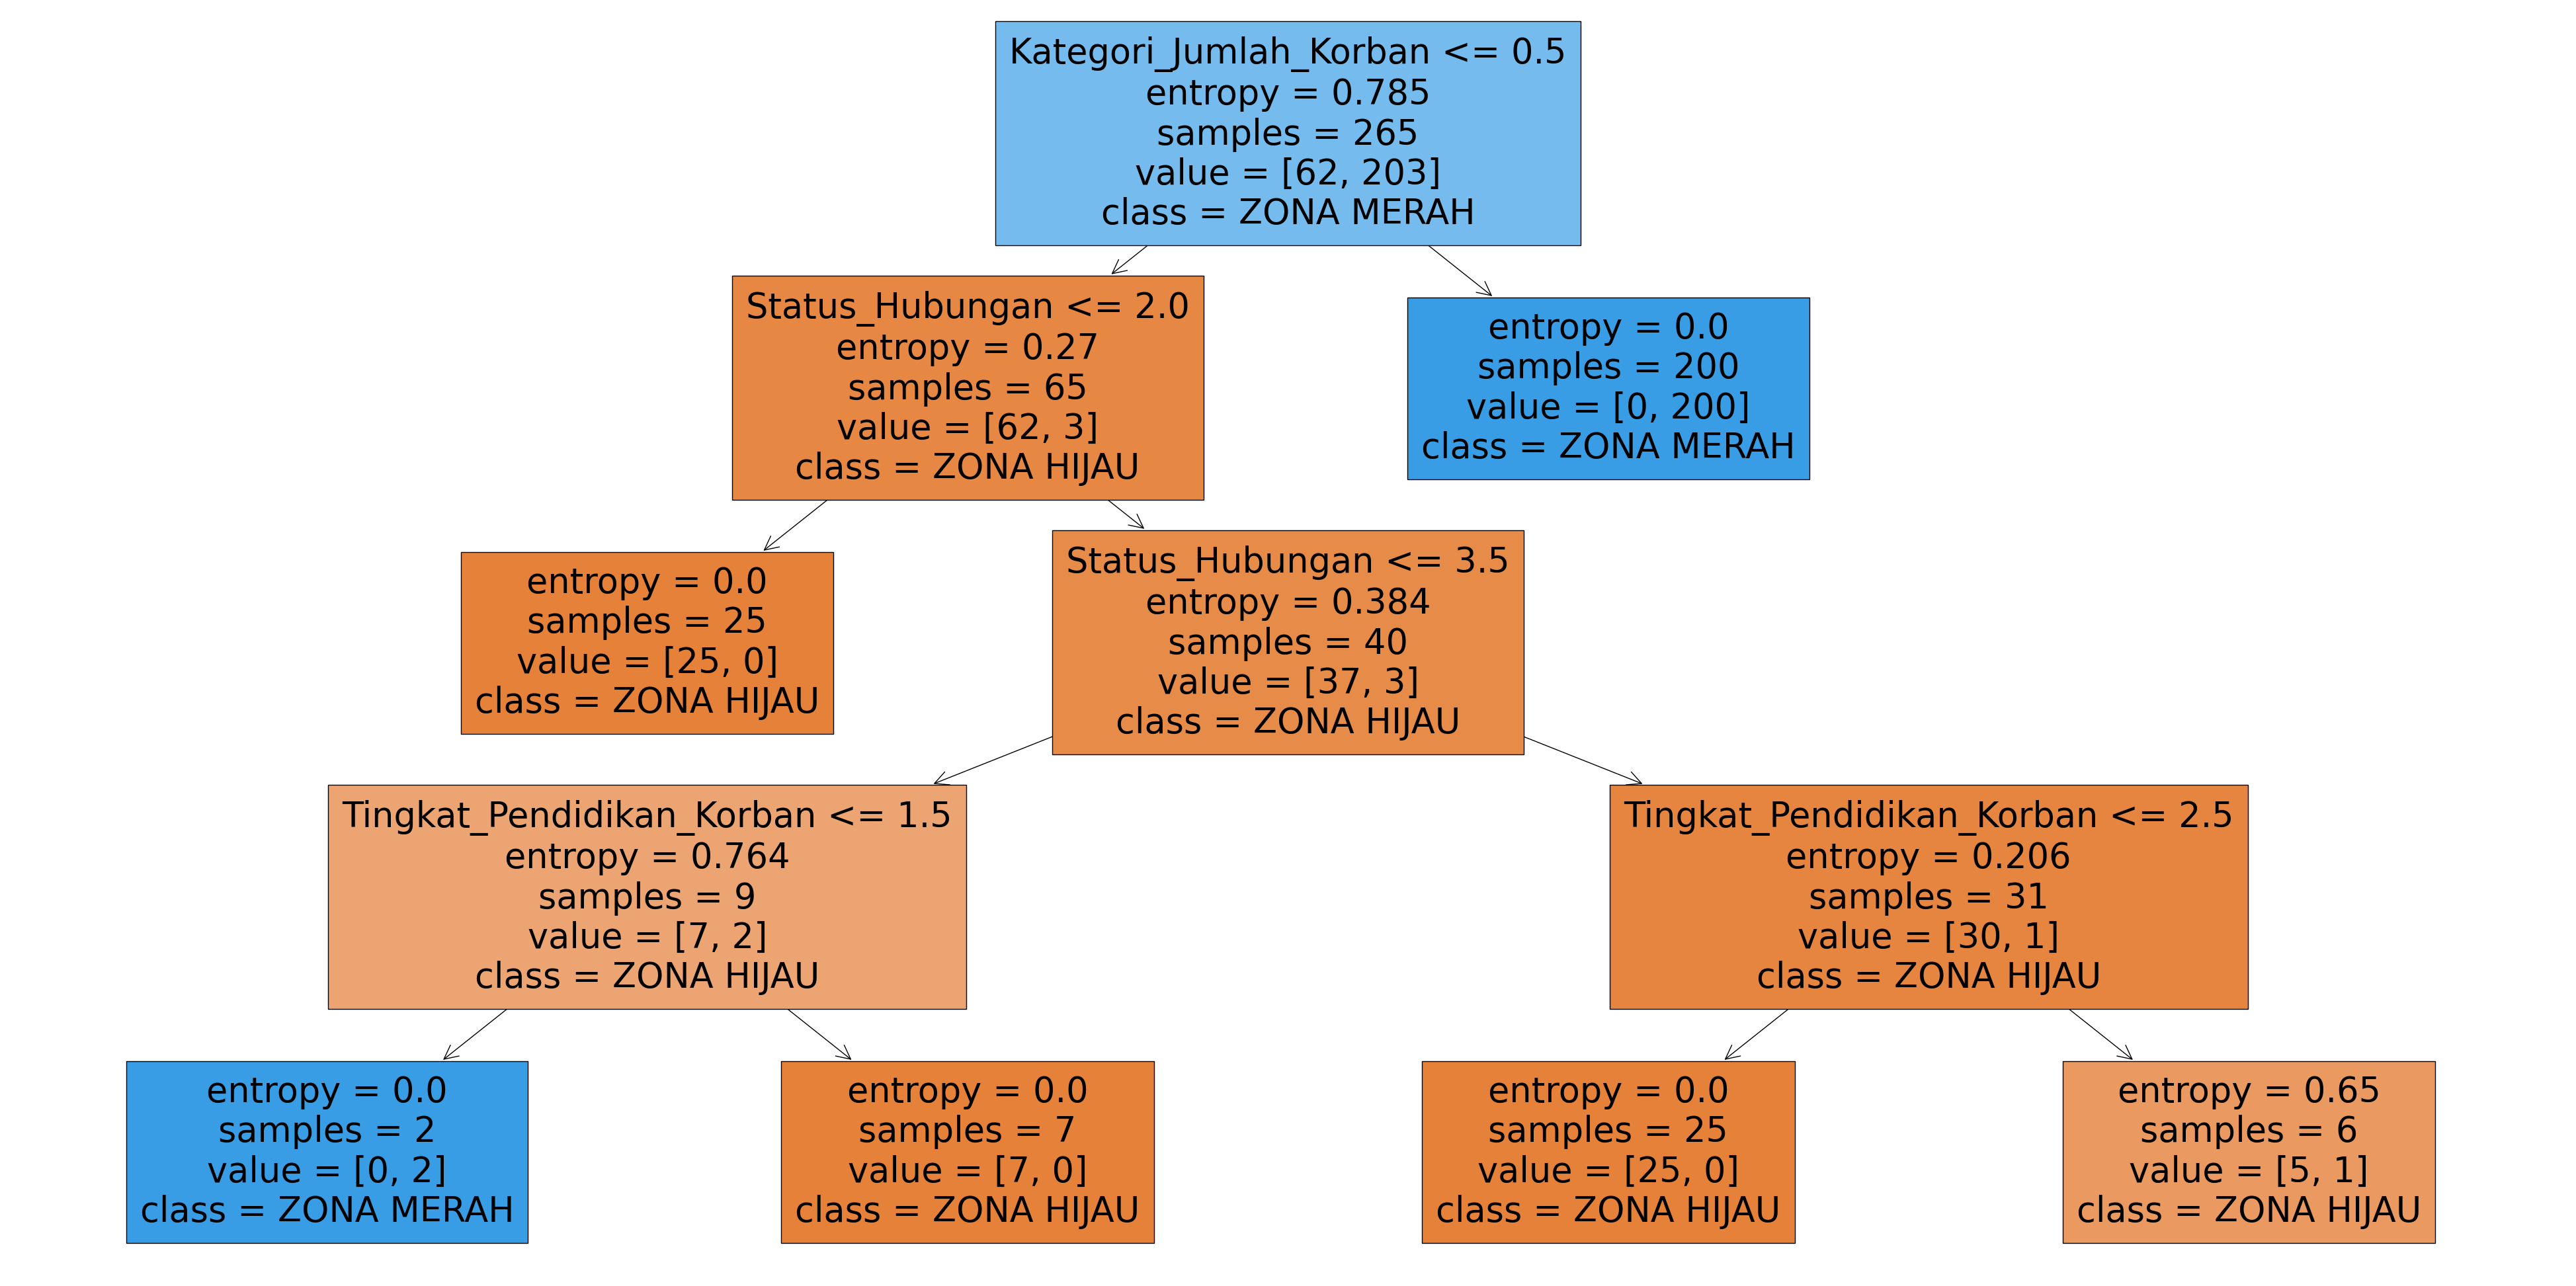

In [ ]:

fig = plt.figure(figsize=(50,25))
tree_data = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['ZONA HIJAU','ZONA MERAH'],
                   filled=True)